In [103]:
#Étape 1 : Importer les packages
#Étape 2 : Charger les données
#Étape 3 : Analyse de données
#Étape 4 : Pretraitement des donnees
#Étape 5 : Diviser les donnees : Train et Test
#Étape 6 : Selection au moins 4 Algorithms de Machine Learning
#Étape 7 : Evaluer les modèles
#Étape 8 : Faire une simple prediction

In [104]:
# 1 Importer les packages

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [106]:
#2: Charger les données

In [107]:
data = pd.read_csv('Bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [108]:
#3 : Analyse de données

In [109]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [111]:
data. isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [112]:
#4 : Pretraitement des donnees

In [113]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
encoder = LabelEncoder()
data['job'] = encoder.fit_transform(data['job'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['previous'] = encoder.fit_transform(data['previous'])
data['month'] = encoder.fit_transform(data['month'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data['contact'] = encoder.fit_transform(data['contact'])
data['marital'] = encoder.fit_transform(data['marital'])
data['y'] = encoder.fit_transform(data['y'])

In [116]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [117]:
import seaborn as sns

<Axes: >

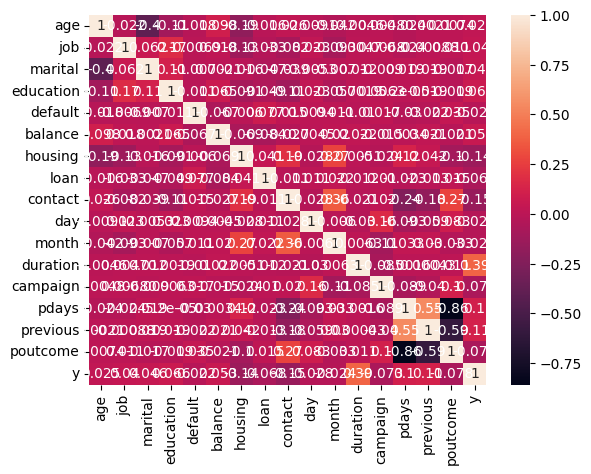

In [118]:
sns.heatmap(data.corr(), annot = True)

In [119]:
data.corr().y.sort_values(ascending=False)

y            1.000000
duration     0.394521
previous     0.114407
pdays        0.103621
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

In [120]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=35)

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [122]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (31647, 16)
X_test: (13564, 16)
y_train: (31647,)
y_test: (13564,)


In [123]:
#5 : Diviser les donnees en variables indep et variable Dep

In [124]:
model_dnn = Sequential()

In [127]:
model_dnn = Sequential()
model_dnn.add(Dense(128, input_shape=(16,), activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dropout(0,4))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(1, activation='sigmoid'))
model_dnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model_dnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,225 (266.50 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#6 Standardiser les donnes (Les variables independantes)

In [130]:
history = model_dnn.fit(X_train, y_train, epochs=60, verbose=1, validation_data=(X_test, y_test))

Epoch 1/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8844 - loss: 0.2895 - val_accuracy: 0.8988 - val_loss: 0.2362
Epoch 2/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8985 - loss: 0.2448 - val_accuracy: 0.8996 - val_loss: 0.2384
Epoch 3/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8954 - loss: 0.2412 - val_accuracy: 0.9008 - val_loss: 0.2326
Epoch 4/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8939 - loss: 0.2392 - val_accuracy: 0.9021 - val_loss: 0.2307
Epoch 5/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8994 - loss: 0.2332 - val_accuracy: 0.9022 - val_loss: 0.2270
Epoch 6/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8967 - loss: 0.2349 - val_accuracy: 0.9025 - val_loss: 0.2274
Epoch 7/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8997 - loss: 0.2330 - val_accuracy: 0.9014 - val_loss: 0.2277
Epoch 8/60
989/989 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9027 - loss: 0.2270 - val_accuracy: 

In [ ]:
#7 Construire le model du Deep Learning

In [131]:
model_dnn.evaluate(X_test, y_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9009 - loss: 0.2284


[0.22913599014282227, 0.9006192684173584]

In [132]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

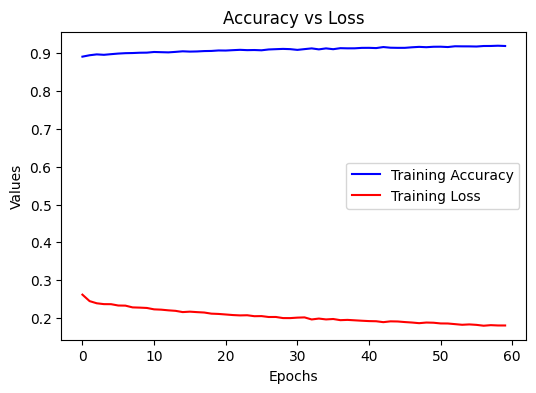

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

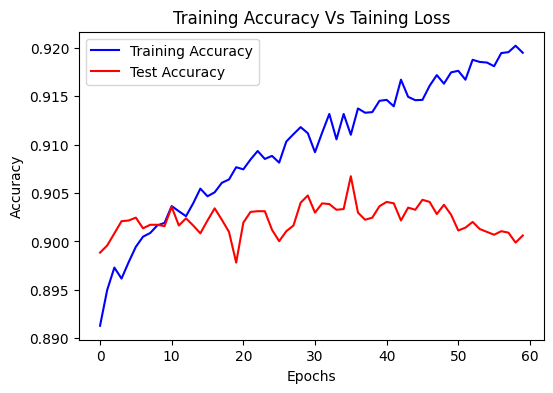

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

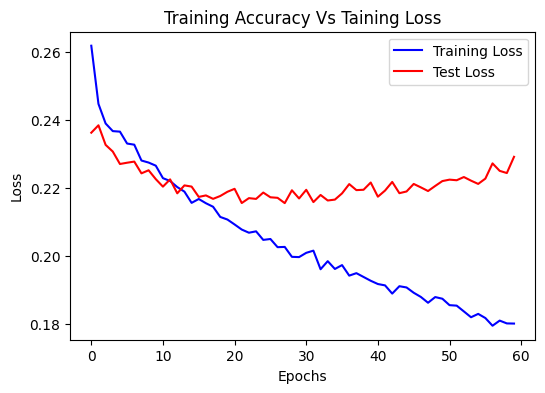

In [135]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

In [138]:
y_pred = model_dnn.predict(X_test)
y_pred

424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[9.2898744e-01],
       [4.9108530e-07],
       [2.5630793e-12],
       ...,
       [1.5780570e-04],
       [2.6589055e-03],
       [1.2557450e-04]], dtype=float32)

In [ ]:
#8 Evaluation du Model de Deep

In [ ]:
#9 Faire la simple prediction

In [ ]:
#10 Sauvegarder le Model du Deep Learning 